# Assignment 2: Image Processing with Noise and Filters
## Student: Alireza Mohammadshafie

### Program Description:
This program demonstrates various image processing techniques including:
1. Image reading and display
2. Adding Gaussian noise
3. Noise removal
4. Edge detection using Sobel and Canny methods
5. Edge detection with different thresholds
6. Image resizing and edge detection
7. Saving results to files

### How to Execute the Program:
1. **Prerequisites**: Make sure you have the required libraries installed:
   - numpy, matplotlib, opencv-python, scipy, pillow
   - Install with: `pip install numpy matplotlib opencv-python scipy pillow`

2. **Image Setup**: Place an image file named 'paris.jpg' in the same directory as this notebook
   - The program is currently configured to load 'paris.jpg'
   - If you want to use a different image, change the 'image_path' variable in Cell 1

3. **Execution Steps**:
   - Run all cells sequentially using Shift+Enter or "Cell > Run All"
   - The program will automatically process the image and display results
   - All output images will be saved to the 'assignment2_results' directory

4. **Expected Output**:
   - Visual displays of all processing steps
   - Console output showing progress and image statistics
   - Saved image files in organized directory structure



In [55]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from scipy import ndimage
from scipy.ndimage import gaussian_filter
import os

# Set up matplotlib for better display
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['image.cmap'] = 'gray'

# Create output directory for saving images
output_dir = "assignment2_results"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created output directory: {output_dir}")

print("Libraries imported successfully!")


Libraries imported successfully!


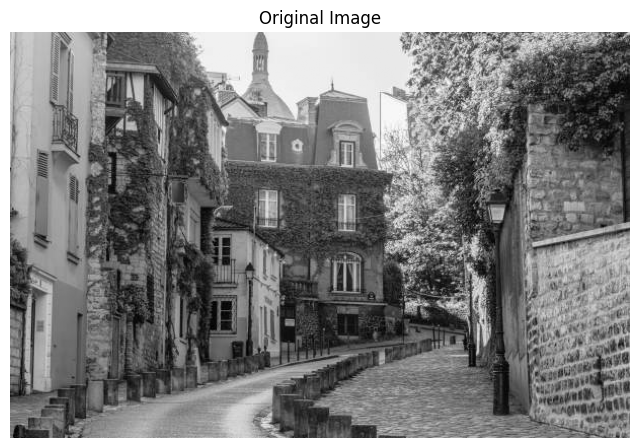

✓ Saved: assignment2_results/01_original_image.jpg - Original input image
Image loaded successfully!
Image shape: (401, 612)
Image data type: uint8
Image value range: 0 to 255


In [56]:
# Task 1: Read and display the image

image_path = 'paris.jpg'

original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


# Display the original image
plt.figure(figsize=(8, 6))
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Save the original image
cv2.imwrite(f"{output_dir}/01_original_image.jpg", original_image)
print(f"✓ Saved: {output_dir}/01_original_image.jpg - Original input image")

print(f"Image loaded successfully!")
print(f"Image shape: {original_image.shape}")
print(f"Image data type: {original_image.dtype}")
print(f"Image value range: {original_image.min()} to {original_image.max()}")


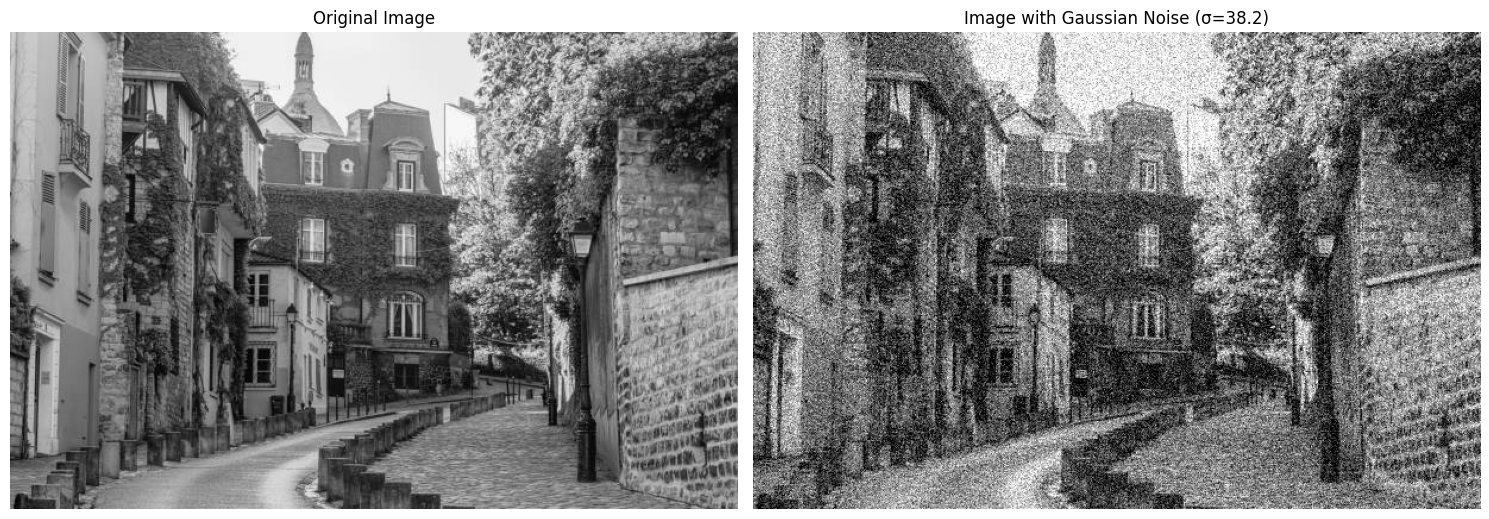

✓ Saved: assignment2_results/02_noisy_image.jpg - Image with Gaussian noise
Gaussian noise added successfully!
Noise level: 15.0% of maximum intensity
Noisy image value range: 0 to 255


In [57]:
# Task 2: Add Gaussian random noise to the image and display both images

def add_gaussian_noise(image, noise_level=0.1):

    # Convert to float for noise addition
    img_float = image.astype(np.float64)
    
    # Calculate noise standard deviation
    noise_std = noise_level * 255
    
    # Generate Gaussian noise
    noise = np.random.normal(0, noise_std, image.shape)
    
    # Add noise to image
    noisy_img = img_float + noise
    
    # Clip values to valid range [0, 255] and convert back to uint8
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    
    return noisy_img

# Add Gaussian noise to the original image
noise_level = 0.15  # 15% of maximum intensity
noisy_image = add_gaussian_noise(original_image, noise_level)

# Display both original and noisy images
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title(f'Image with Gaussian Noise (σ={noise_level*255:.1f})')
plt.axis('off')

plt.tight_layout()
plt.show()

# Save the noisy image
cv2.imwrite(f"{output_dir}/02_noisy_image.jpg", noisy_image)
print(f"✓ Saved: {output_dir}/02_noisy_image.jpg - Image with Gaussian noise")

print(f"Gaussian noise added successfully!")
print(f"Noise level: {noise_level*100:.1f}% of maximum intensity")
print(f"Noisy image value range: {noisy_image.min()} to {noisy_image.max()}")


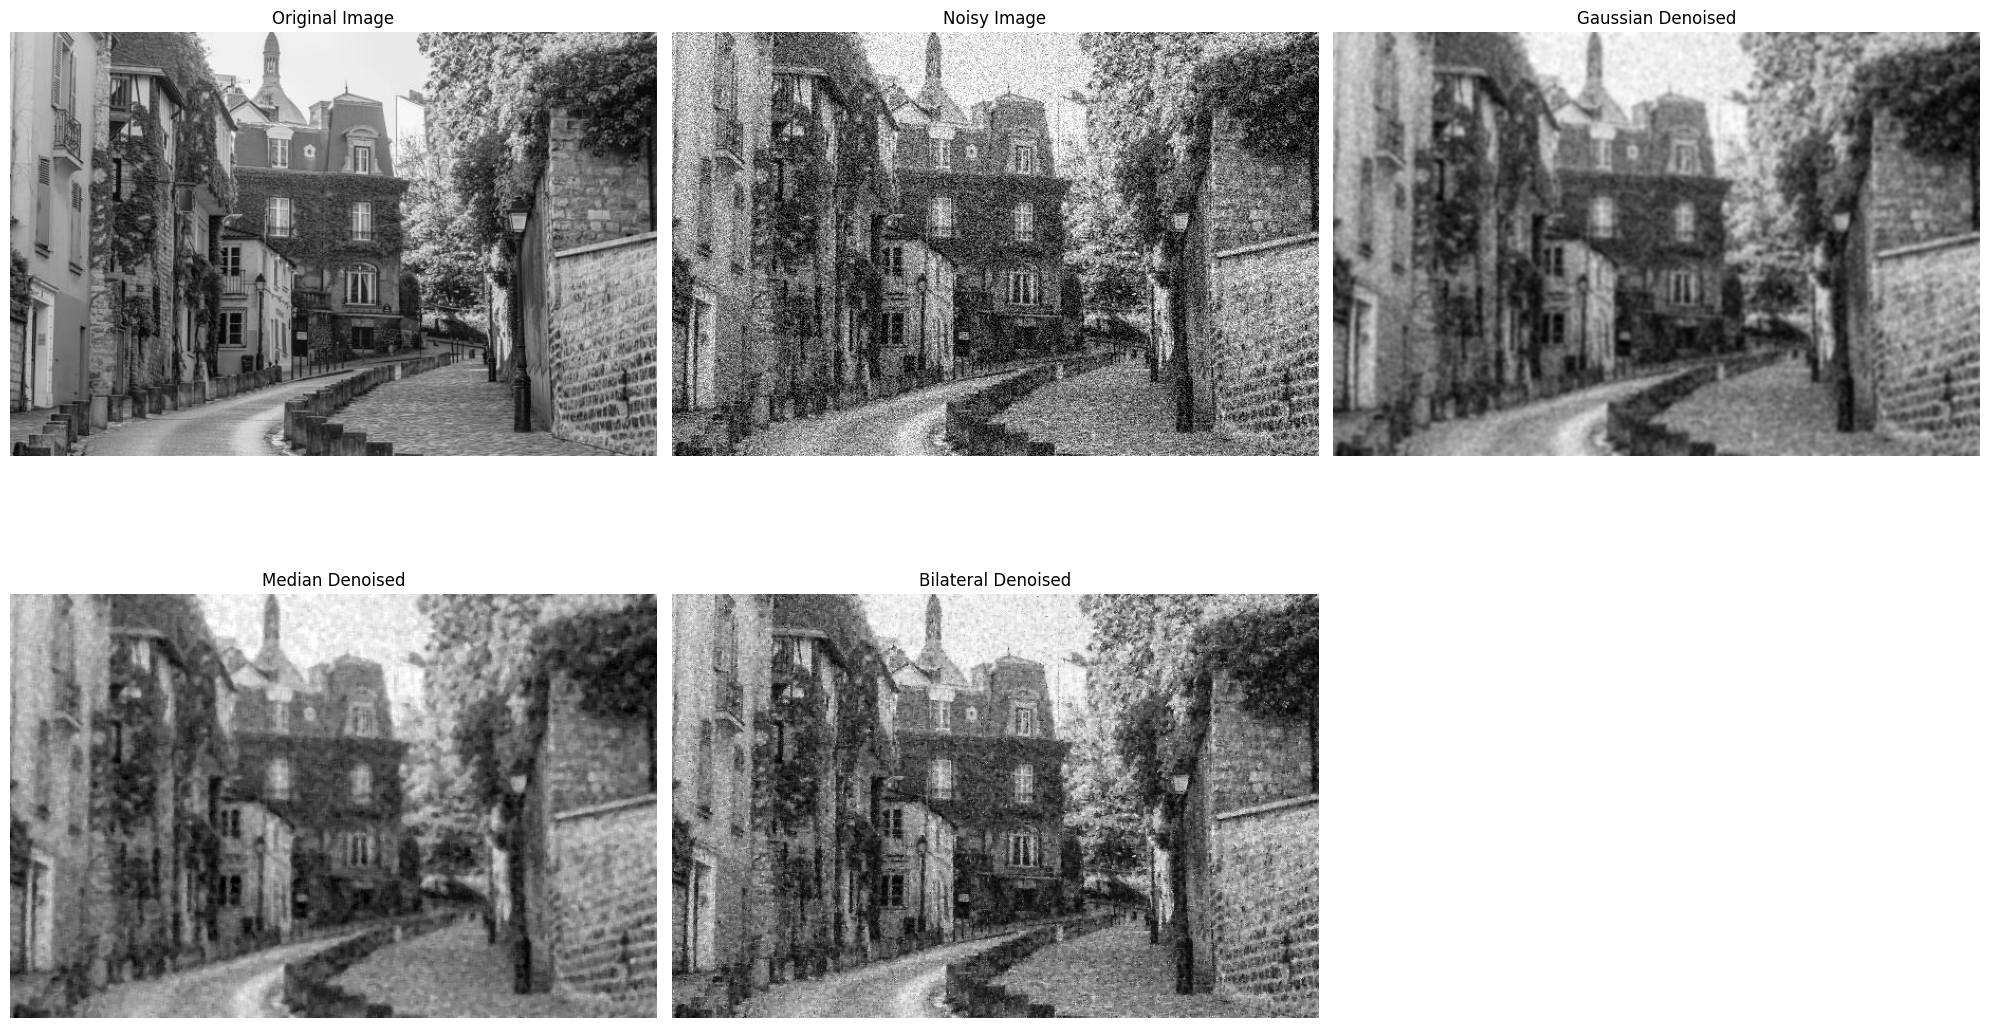

✓ Saved: assignment2_results/03_gaussian_denoised.jpg - Gaussian denoised
✓ Saved: assignment2_results/04_median_denoised.jpg - Median denoised
✓ Saved: assignment2_results/05_bilateral_denoised.jpg - Bilateral denoised
Noise removal completed!
Applied Gaussian, Median, and Bilateral filtering methods
Bilateral filter typically provides the best edge-preserving denoising


In [58]:
# Task 3: Remove noise and display the result image

def denoise_image(image, method='gaussian', kernel_size=5, sigma=1.0):

    if method == 'gaussian':
        # Gaussian filter for noise removal
        denoised = gaussian_filter(image, sigma=sigma)
    elif method == 'median':
        # Median filter for salt-and-pepper noise removal
        denoised = ndimage.median_filter(image, size=kernel_size)
    elif method == 'bilateral':
        # Bilateral filter for edge-preserving denoising
        denoised = cv2.bilateralFilter(image, kernel_size, sigma*50, sigma*50)
    else:
        raise ValueError(f"Unknown denoising method: {method}")
    
    return denoised.astype(np.uint8)

# Apply different denoising methods
gaussian_denoised = denoise_image(noisy_image, method='gaussian', sigma=1.5)
median_denoised = denoise_image(noisy_image, method='median', kernel_size=5)
bilateral_denoised = denoise_image(noisy_image, method='bilateral', kernel_size=5, sigma=1.0)

# Display original, noisy, and denoised images
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(gaussian_denoised, cmap='gray')
plt.title('Gaussian Denoised')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(median_denoised, cmap='gray')
plt.title('Median Denoised')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(bilateral_denoised, cmap='gray')
plt.title('Bilateral Denoised')
plt.axis('off')


plt.tight_layout()
plt.show()

# Save denoised images
cv2.imwrite(f"{output_dir}/03_gaussian_denoised.jpg", gaussian_denoised)
cv2.imwrite(f"{output_dir}/04_median_denoised.jpg", median_denoised)
cv2.imwrite(f"{output_dir}/05_bilateral_denoised.jpg", bilateral_denoised)
print(f"✓ Saved: {output_dir}/03_gaussian_denoised.jpg - Gaussian denoised")
print(f"✓ Saved: {output_dir}/04_median_denoised.jpg - Median denoised")
print(f"✓ Saved: {output_dir}/05_bilateral_denoised.jpg - Bilateral denoised")

print("Noise removal completed!")
print("Applied Gaussian, Median, and Bilateral filtering methods")
print("Bilateral filter typically provides the best edge-preserving denoising")


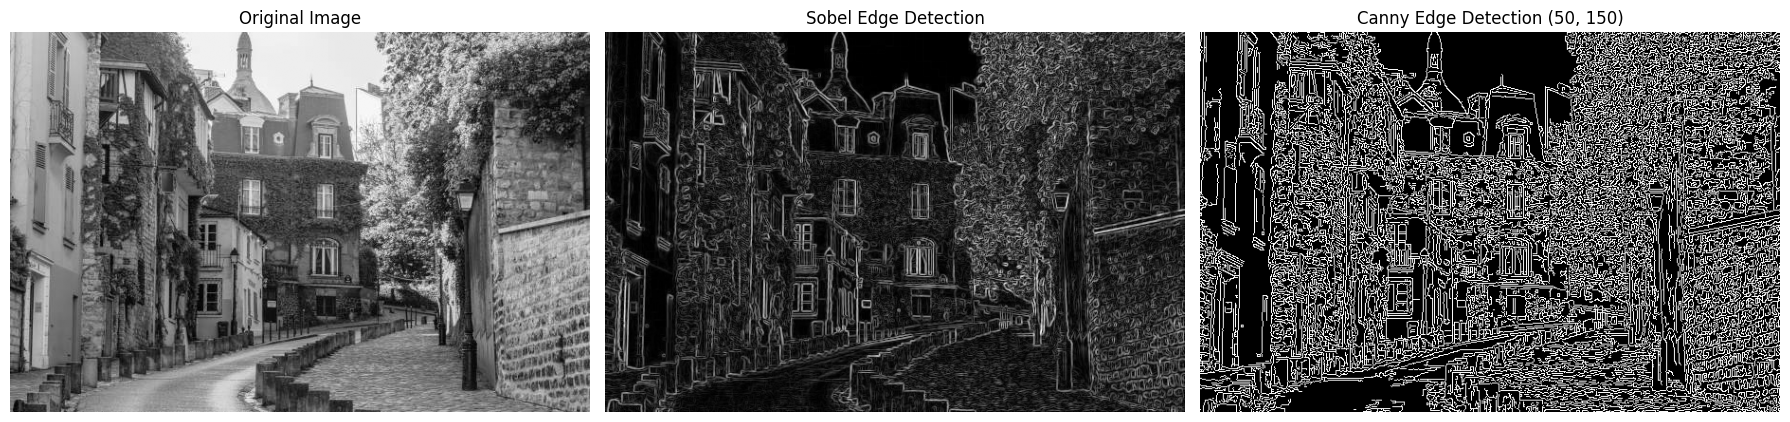

✓ Saved: assignment2_results/06_sobel_edges_original.jpg - Sobel edges - original
✓ Saved: assignment2_results/07_canny_edges_original.jpg - Canny edges - original
Edge detection completed!
Applied Sobel and Canny edge detection methods
Sobel shows edge magnitude, Canny shows binary edge map


In [59]:
# Task 4: Apply Sobel and Canny edge detector to the original image

def apply_sobel_edge_detection(image):

    # Calculate gradients in x and y directions
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Calculate edge magnitude
    edge_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
    # Normalize to 0-255 range
    edge_magnitude = np.uint8(edge_magnitude / edge_magnitude.max() * 255)
    
    return edge_magnitude

def apply_canny_edge_detection(image, low_threshold=50, high_threshold=150):

    edges = cv2.Canny(image, low_threshold, high_threshold)
    return edges

# Apply Sobel edge detection
sobel_edges = apply_sobel_edge_detection(original_image)

# Apply Canny edge detection with default thresholds
canny_edges_default = apply_canny_edge_detection(original_image, 50, 150)

# Display original image and edge detection results
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(canny_edges_default, cmap='gray')
plt.title('Canny Edge Detection (50, 150)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Save edge detection results
cv2.imwrite(f"{output_dir}/06_sobel_edges_original.jpg", sobel_edges)
cv2.imwrite(f"{output_dir}/07_canny_edges_original.jpg", canny_edges_default)
print(f"✓ Saved: {output_dir}/06_sobel_edges_original.jpg - Sobel edges - original")
print(f"✓ Saved: {output_dir}/07_canny_edges_original.jpg - Canny edges - original")

print("Edge detection completed!")
print("Applied Sobel and Canny edge detection methods")
print("Sobel shows edge magnitude, Canny shows binary edge map")


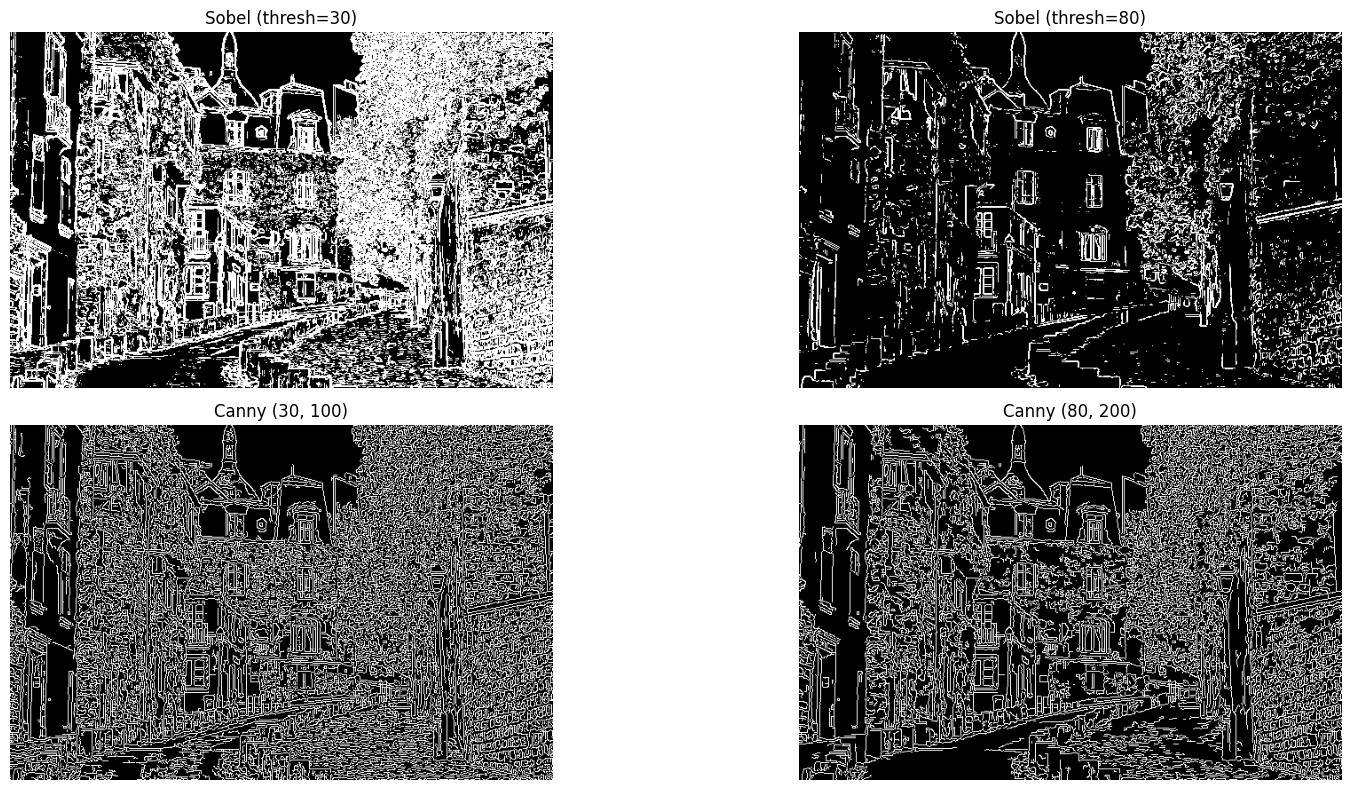

✓ Saved: assignment2_results/08_sobel_low_threshold.jpg - Sobel edges - low threshold
✓ Saved: assignment2_results/08_sobel_high_threshold.jpg - Sobel edges - high threshold
✓ Saved: assignment2_results/09_canny_low_thresholds.jpg - Canny edges - low thresholds
✓ Saved: assignment2_results/09_canny_high_thresholds.jpg - Canny edges - high thresholds
Displayed Sobel and Canny edge detection with two different thresholds each.
Lower thresholds: more edges detected (more sensitive).
Higher thresholds: fewer edges detected (less sensitive).


In [60]:
# Task 5: Apply Sobel and Canny edge detector to the original image and display results

# --- 2. Repeat with two different thresholds for each method (just two sets) ---

# Define two different threshold sets for both methods
sobel_thresholds = [30, 80]  # low and high for Sobel
canny_thresholds = [
    (30, 100),  # low thresholds for Canny
    (80, 200)   # high thresholds for Canny
]

# Apply Sobel with two thresholds
sobel_edges_low = (sobel_edges > sobel_thresholds[0]).astype(np.uint8) * 255
sobel_edges_high = (sobel_edges > sobel_thresholds[1]).astype(np.uint8) * 255

# Apply Canny with two threshold sets
canny_edges_low = apply_canny_edge_detection(original_image, canny_thresholds[0][0], canny_thresholds[0][1])
canny_edges_high = apply_canny_edge_detection(original_image, canny_thresholds[1][0], canny_thresholds[1][1])

# Display all results (just two sets for each method)
plt.figure(figsize=(18, 8))

# Sobel - low threshold
plt.subplot(2, 2, 1)
plt.imshow(sobel_edges_low, cmap='gray')
plt.title(f'Sobel (thresh={sobel_thresholds[0]})')
plt.axis('off')

# Sobel - high threshold
plt.subplot(2, 2, 2)
plt.imshow(sobel_edges_high, cmap='gray')
plt.title(f'Sobel (thresh={sobel_thresholds[1]})')
plt.axis('off')

# Canny - low thresholds
plt.subplot(2, 2, 3)
plt.imshow(canny_edges_low, cmap='gray')
plt.title(f'Canny ({canny_thresholds[0][0]}, {canny_thresholds[0][1]})')
plt.axis('off')

# Canny - high thresholds
plt.subplot(2, 2, 4)
plt.imshow(canny_edges_high, cmap='gray')
plt.title(f'Canny ({canny_thresholds[1][0]}, {canny_thresholds[1][1]})')
plt.axis('off')

plt.tight_layout()
plt.show()

# Save edge detection with different thresholds
cv2.imwrite(f"{output_dir}/08_sobel_low_threshold.jpg", sobel_edges_low)
cv2.imwrite(f"{output_dir}/08_sobel_high_threshold.jpg", sobel_edges_high)
cv2.imwrite(f"{output_dir}/09_canny_low_thresholds.jpg", canny_edges_low)
cv2.imwrite(f"{output_dir}/09_canny_high_thresholds.jpg", canny_edges_high)
print(f"✓ Saved: {output_dir}/08_sobel_low_threshold.jpg - Sobel edges - low threshold")
print(f"✓ Saved: {output_dir}/08_sobel_high_threshold.jpg - Sobel edges - high threshold")
print(f"✓ Saved: {output_dir}/09_canny_low_thresholds.jpg - Canny edges - low thresholds")
print(f"✓ Saved: {output_dir}/09_canny_high_thresholds.jpg - Canny edges - high thresholds")

print("Displayed Sobel and Canny edge detection with two different thresholds each.")
print("Lower thresholds: more edges detected (more sensitive).")
print("Higher thresholds: fewer edges detected (less sensitive).")


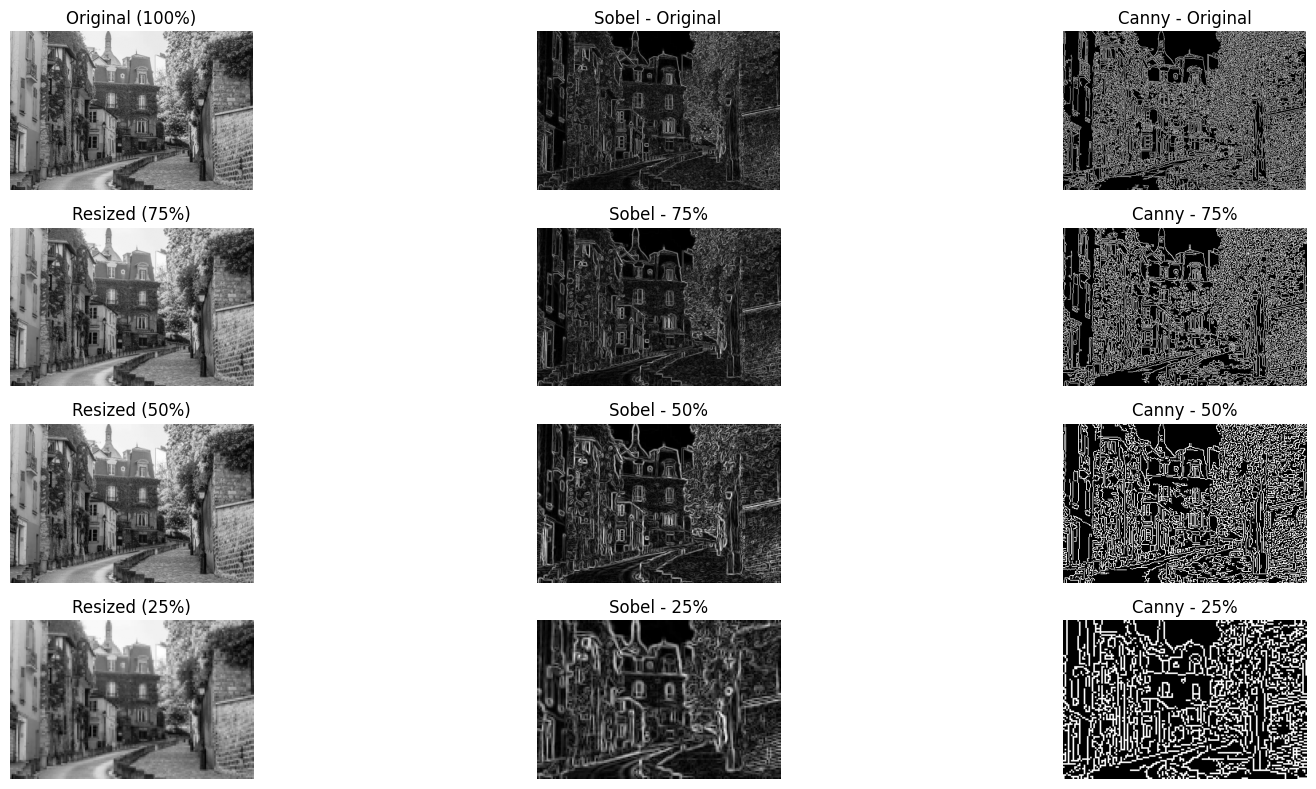

✓ Saved: assignment2_results/10_resized_75.jpg - Resized image - 75%
✓ Saved: assignment2_results/11_sobel_resized_75.jpg - Sobel edges - resized 75%
✓ Saved: assignment2_results/12_canny_resized_75.jpg - Canny edges - resized 75%
✓ Saved: assignment2_results/10_resized_50.jpg - Resized image - 50%
✓ Saved: assignment2_results/11_sobel_resized_50.jpg - Sobel edges - resized 50%
✓ Saved: assignment2_results/12_canny_resized_50.jpg - Canny edges - resized 50%
✓ Saved: assignment2_results/10_resized_25.jpg - Resized image - 25%
✓ Saved: assignment2_results/11_sobel_resized_25.jpg - Sobel edges - resized 25%
✓ Saved: assignment2_results/12_canny_resized_25.jpg - Canny edges - resized 25%
Image resizing and edge detection (Sobel and Canny) completed!
Notice how edge detection quality changes with image resolution.
Lower resolution images may lose fine details but can be processed faster.


In [61]:
# Task 6: Resize the original image and apply edge detection (Sobel and Canny)

def resize_image(image, scale_factor):
    height, width = image.shape[:2]
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)
    resized = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    return resized

# Define scale factors
scale_factors = [0.75, 0.5, 0.25]
scale_names = ['75%', '50%', '25%']

# Resize images and apply Sobel and Canny edge detection
resized_results = {}

for scale, name in zip(scale_factors, scale_names):
    # Resize the original image
    resized_img = resize_image(original_image, scale)
    # Apply Sobel edge detection
    sobel_resized = apply_sobel_edge_detection(resized_img)
    # Apply Canny edge detection (default thresholds)
    canny_resized = apply_canny_edge_detection(resized_img, 50, 150)
    resized_results[name] = {
        'image': resized_img,
        'sobel': sobel_resized,
        'canny': canny_resized,
        'scale': scale
    }

# Display original and resized images with their edge detection results
plt.figure(figsize=(18, 8))

# Original image and its edge detection results
plt.subplot(4, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original (100%)')
plt.axis('off')

plt.subplot(4, 3, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel - Original')
plt.axis('off')

plt.subplot(4, 3, 3)
plt.imshow(canny_edges_default, cmap='gray')
plt.title('Canny - Original')
plt.axis('off')

# Resized images and their edge detection
for i, (name, result) in enumerate(resized_results.items()):
    row = i + 2  # rows 2, 3, 4
    plt.subplot(4, 3, row*3 - 2)
    plt.imshow(result['image'], cmap='gray')
    plt.title(f'Resized ({name})')
    plt.axis('off')
    
    plt.subplot(4, 3, row*3 - 1)
    plt.imshow(result['sobel'], cmap='gray')
    plt.title(f'Sobel - {name}')
    plt.axis('off')
    
    plt.subplot(4, 3, row*3)
    plt.imshow(result['canny'], cmap='gray')
    plt.title(f'Canny - {name}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Save resized images and their edge detection results
for name, result in resized_results.items():
    cv2.imwrite(f"{output_dir}/10_resized_{name.replace('%', '')}.jpg", result['image'])
    cv2.imwrite(f"{output_dir}/11_sobel_resized_{name.replace('%', '')}.jpg", result['sobel'])
    cv2.imwrite(f"{output_dir}/12_canny_resized_{name.replace('%', '')}.jpg", result['canny'])
    print(f"✓ Saved: {output_dir}/10_resized_{name.replace('%', '')}.jpg - Resized image - {name}")
    print(f"✓ Saved: {output_dir}/11_sobel_resized_{name.replace('%', '')}.jpg - Sobel edges - resized {name}")
    print(f"✓ Saved: {output_dir}/12_canny_resized_{name.replace('%', '')}.jpg - Canny edges - resized {name}")

print("Image resizing and edge detection (Sobel and Canny) completed!")
print("Notice how edge detection quality changes with image resolution.")
print("Lower resolution images may lose fine details but can be processed faster.")
